In [14]:
%load_ext rpy2.ipython

import pandas as pd
from metasub_utils.packet_parse import MetaSUBTableFactory
from capalyzer.packet_parser.experimental import umap
import warnings
from os.path import isfile

warnings.filterwarnings('ignore')

foo = MetaSUBTableFactory.all_factory()
controls = foo.metadata.loc[~foo.metadata['control_type_fine'].isna() | ~foo.metadata['control_type_coarse'].isna()]
cntrl_tabler = foo.copy(new_metadata=controls)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [5]:
%%R

library(ggthemes)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ALDEx2)
library(RColorBrewer)

In [62]:
mobiome_samples = cntrl_tabler.metadata.loc[cntrl_tabler.metadata['control_type_fine'].map(lambda x: isinstance(x, str) and 'mobiome' in x)]
mobiome_groups = {}
def printit(tbl):
    val = tbl['control_type_fine'].iloc[0]
    samps = tbl.index.tolist()
    mobiome_groups[val] = samps
    return tbl

mobiome_samples.groupby('control_type_fine').apply(printit)
mobiome_groups

{'mobiome_media_pellet_swab': ['sossowski_BarcelonaNov2018_MS041-29787-TAGGCATG-AAGGAGTA',
  'sossowski_BarcelonaNov2018_MS047-29787-CTCTCTAC-GTAAGGAG',
  'sossowski_BarcelonaNov2018_MS053-29787-CGAGGCTG-CTCTCTAT'],
 'mobiome_media_swab': ['sossowski_BarcelonaNov2018_MS040-29787-TAGGCATG-ACTGCATA',
  'sossowski_BarcelonaNov2018_MS046-29787-CTCTCTAC-TATCCTCT',
  'sossowski_BarcelonaNov2018_MS052-29787-CTCTCTAC-TCTCTCCG'],
 'mobiome_positive_media_pellet_swab': ['sossowski_BarcelonaNov2018_MS038-29786-TAGGCATG-TATCCTCT',
  'sossowski_BarcelonaNov2018_MS044-29786-TAGGCATG-TCTCTCCG',
  'sossowski_BarcelonaNov2018_MS050-29786-CTCTCTAC-CTAAGCCT'],
 'mobiome_positive_media_swab': ['sossowski_BarcelonaNov2018_MS037-29786-TAGGCATG-CTCTCTAT',
  'sossowski_BarcelonaNov2018_MS043-29786-TAGGCATG-CGTCTAAT',
  'sossowski_BarcelonaNov2018_MS049-29786-CTCTCTAC-AAGGAGTA'],
 'mobiome_positive_swab': ['sossowski_BarcelonaNov2018_MS036-29786-GGACTCCT-TCTCTCCG',
  'sossowski_BarcelonaNov2018_MS042-29786-TAG

In [99]:
mobiome_samples

,metasub_name,core_project,project,city,city_code,latitude,longitude,surface_material,control_type,elevation,...,plate_number,plate_pos,sample_type,sl_name,control_type_fine,control_type_coarse,surface_ontology_fine,surface_ontology_coarse,coastal,city_elevation
uuid,,,,,,,,,,,,,,,,,,,,,
sossowski_BarcelonaNov2018_MS036-29786-GGACTCCT-TCTCTCCG,NaN,core,PILOT,barcelona,BCN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,mobiome_positive_swab,NaN,NaN,NaN,"(coastal, coastal)",coastal
sossowski_BarcelonaNov2018_MS037-29786-TAGGCATG-CTCTCTAT,NaN,core,PILOT,barcelona,BCN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,mobiome_positive_media_swab,NaN,NaN,NaN,"(coastal, coastal)",coastal
sossowski_BarcelonaNov2018_MS038-29786-TAGGCATG-TATCCTCT,NaN,core,PILOT,barcelona,BCN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,mobiome_positive_media_pellet_swab,NaN,NaN,NaN,"(coastal, coastal)",coastal
sossowski_BarcelonaNov2018_MS039-29786-TAGGCATG-GTAAGGAG,NaN,core,PILOT,barcelona,BCN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,mobiome_swab,NaN,NaN,NaN,"(coastal, coastal)",coastal
sossowski_BarcelonaNov2018_MS040-29787-TAGGCATG-ACTGCATA,NaN,core,PILOT,barcelona,BCN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,mobiome_media_swab,NaN,NaN,NaN,"(coastal, coastal)",coastal
sossowski_BarcelonaNov2018_MS041-29787-TAGGCATG-AAGGAGTA,NaN,core,PILOT,barcelona,BCN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,mobiome_media_pellet_swab,NaN,NaN,NaN,"(coastal, coastal)",coastal
sossowski_BarcelonaNov2018_MS042-29786-TAGGCATG-CTAAGCCT,NaN,core,PILOT,barcelona,BCN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,mobiome_positive_swab,NaN,NaN,NaN,"(coastal, coastal)",coastal
sossowski_BarcelonaNov2018_MS043-29786-TAGGCATG-CGTCTAAT,NaN,core,PILOT,barcelona,BCN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,mobiome_positive_media_swab,NaN,NaN,NaN,"(coastal, coastal)",coastal
sossowski_BarcelonaNov2018_MS044-29786-TAGGCATG-TCTCTCCG,NaN,core,PILOT,barcelona,BCN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,mobiome_positive_media_pellet_swab,NaN,NaN,NaN,"(coastal, coastal)",coastal


In [63]:
zymo_samples = cntrl_tabler.metadata.loc[cntrl_tabler.metadata['control_type_fine'].map(lambda x: isinstance(x, str) and 'zymo' in x)]
zymo_groups = {}
def printit(tbl):
    val = tbl['control_type_fine'].iloc[0]
    samps = tbl.index.tolist()
    zymo_groups[val] = samps
    return tbl

zymo_samples.groupby('control_type_fine').apply(printit)
zymo_groups

{'zymoshield_media_swab_tube': ['haib17DB4959_H3MGVCCXY_SL259928',
  'haib17DB4959_H3MGVCCXY_SL259937',
  'haib17DB4959_H3MGVCCXY_SL259946'],
 'zymoshield_media_tube': ['haib17DB4959_H3MGVCCXY_SL259927',
  'haib17DB4959_H3MGVCCXY_SL259936',
  'haib17DB4959_H3MGVCCXY_SL259945'],
 'zymoshield_positive_control': ['haib17DB4959_H3MGVCCXY_SL259952'],
 'zymoshield_swab_tube': ['haib17DB4959_H3MGVCCXY_SL259926',
  'haib17DB4959_H3MGVCCXY_SL259935',
  'haib17DB4959_H3MGVCCXY_SL259944'],
 'zymoshield_tube': ['haib17DB4959_H3MGVCCXY_SL259925',
  'haib17DB4959_H3MGVCCXY_SL259934',
  'haib17DB4959_H3MGVCCXY_SL259943']}

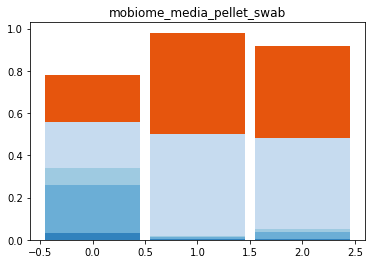

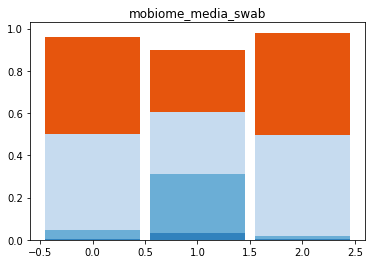

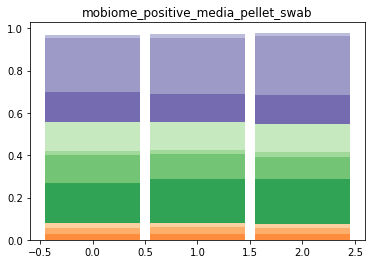

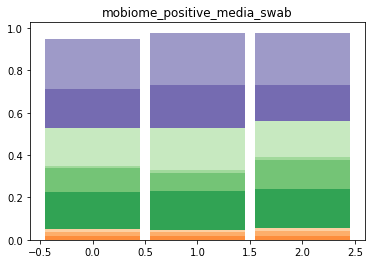

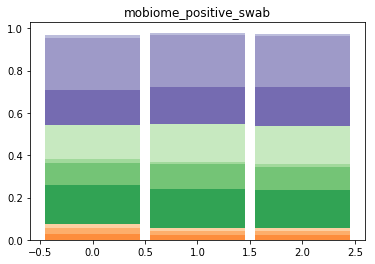

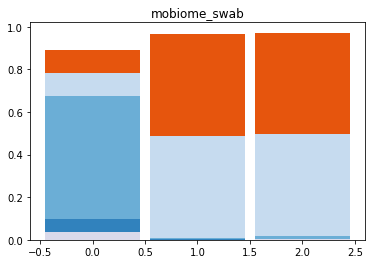

In [64]:
import matplotlib.pyplot as plt

taxa = cntrl_tabler.taxonomy(normalize=True)
cmap = plt.get_cmap('tab20c')
color_map = {}

for grp_name, samps in mobiome_groups.items():
    mytaxa = taxa.loc[samps]
    prev = []
    for taxon, col in mytaxa.iteritems():
        if col.mean() < 0.01:
            continue
        color_map[taxon] = color_map.get(taxon, cmap(len(color_map)))
        if prev:
            plt.bar([0,1,2], col, bottom=sum(prev), width=0.9, color=color_map[taxon])
            prev.append(col)
        else:
            plt.bar([0,1,2], col, width=0.9, color=color_map[taxon])
            prev.append(col)
    plt.title(grp_name)
    plt.show()


In [ ]:
from matplotlib import pyplot as plt        
import matplotlib.patches as mpatches


patches = [mpatches.Patch(color=col, label=taxa) for taxa, col in color_map.items()]
plt.subplots(dpi=300)
plt.legend(handles=patches)

ax = plt.gca()
ax.axis('off')

plt.show()

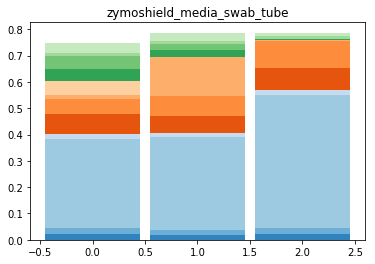

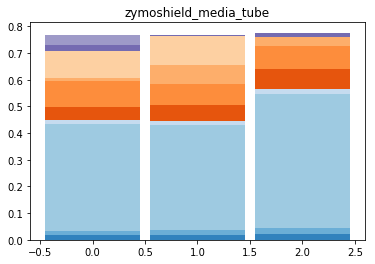

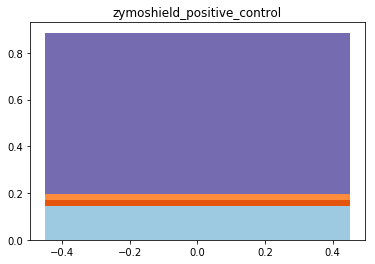

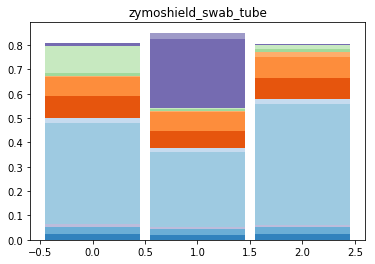

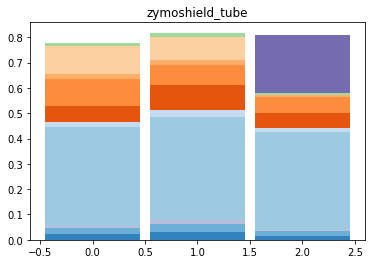

In [67]:
import matplotlib.pyplot as plt

taxa = cntrl_tabler.taxonomy(normalize=True)
cmap = plt.get_cmap('tab20c')
color_map = {}

for grp_name, samps in zymo_groups.items():
    mytaxa = taxa.loc[samps]
    prev = []
    for taxon, col in mytaxa.iteritems():
        if col.mean() < 0.01:
            continue
        color_map[taxon] = color_map.get(taxon, cmap(len(color_map)))
        if prev:
            plt.bar(range(len(samps)), col, bottom=sum(prev), width=0.9, color=color_map[taxon])
            prev.append(col)
        else:
            plt.bar(range(len(samps)), col, width=0.9, color=color_map[taxon])
            prev.append(col)
    plt.title(grp_name)
    plt.show()

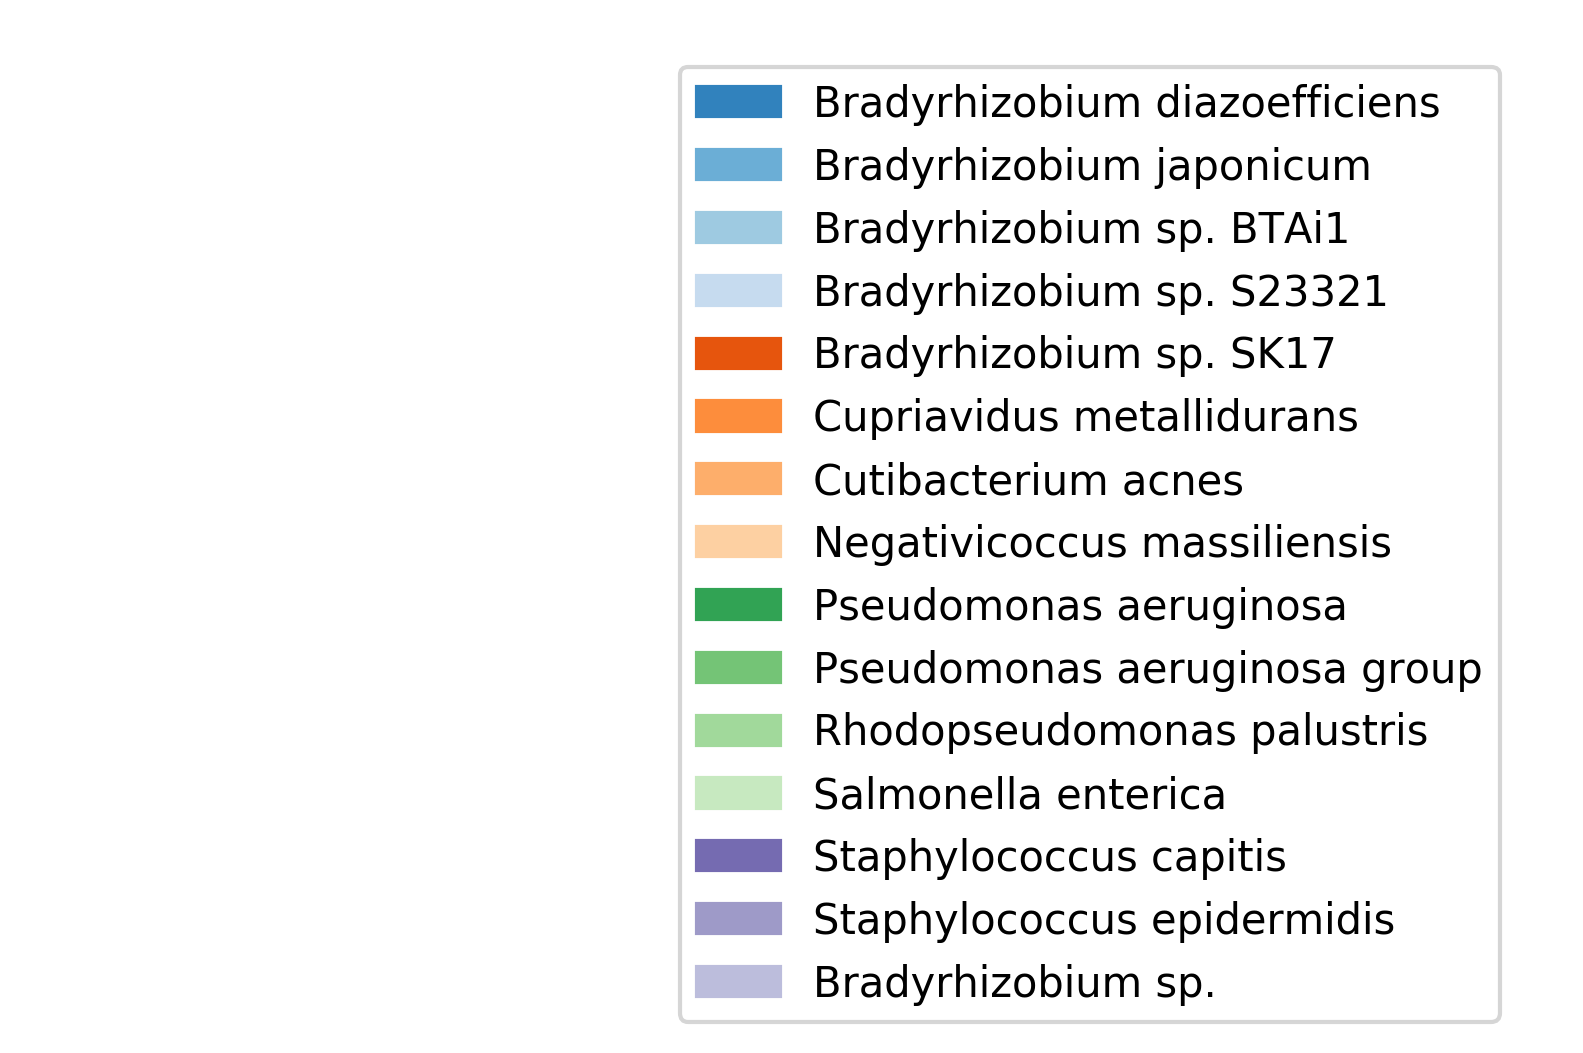

In [66]:
from matplotlib import pyplot as plt        
import matplotlib.patches as mpatches


patches = [mpatches.Patch(color=col, label=taxa) for taxa, col in color_map.items()]
plt.subplots(dpi=300)
plt.legend(handles=patches)

ax = plt.gca()
ax.axis('off')

plt.show()

{'zymoshield_media_swab_tube': ['haib17DB4959_H3MGVCCXY_SL259928',
  'haib17DB4959_H3MGVCCXY_SL259937',
  'haib17DB4959_H3MGVCCXY_SL259946'],
 'zymoshield_media_tube': ['haib17DB4959_H3MGVCCXY_SL259927',
  'haib17DB4959_H3MGVCCXY_SL259936',
  'haib17DB4959_H3MGVCCXY_SL259945'],
 'zymoshield_positive_control': ['haib17DB4959_H3MGVCCXY_SL259952'],
 'zymoshield_swab_tube': ['haib17DB4959_H3MGVCCXY_SL259926',
  'haib17DB4959_H3MGVCCXY_SL259935',
  'haib17DB4959_H3MGVCCXY_SL259944'],
 'zymoshield_tube': ['haib17DB4959_H3MGVCCXY_SL259925',
  'haib17DB4959_H3MGVCCXY_SL259934',
  'haib17DB4959_H3MGVCCXY_SL259943']}

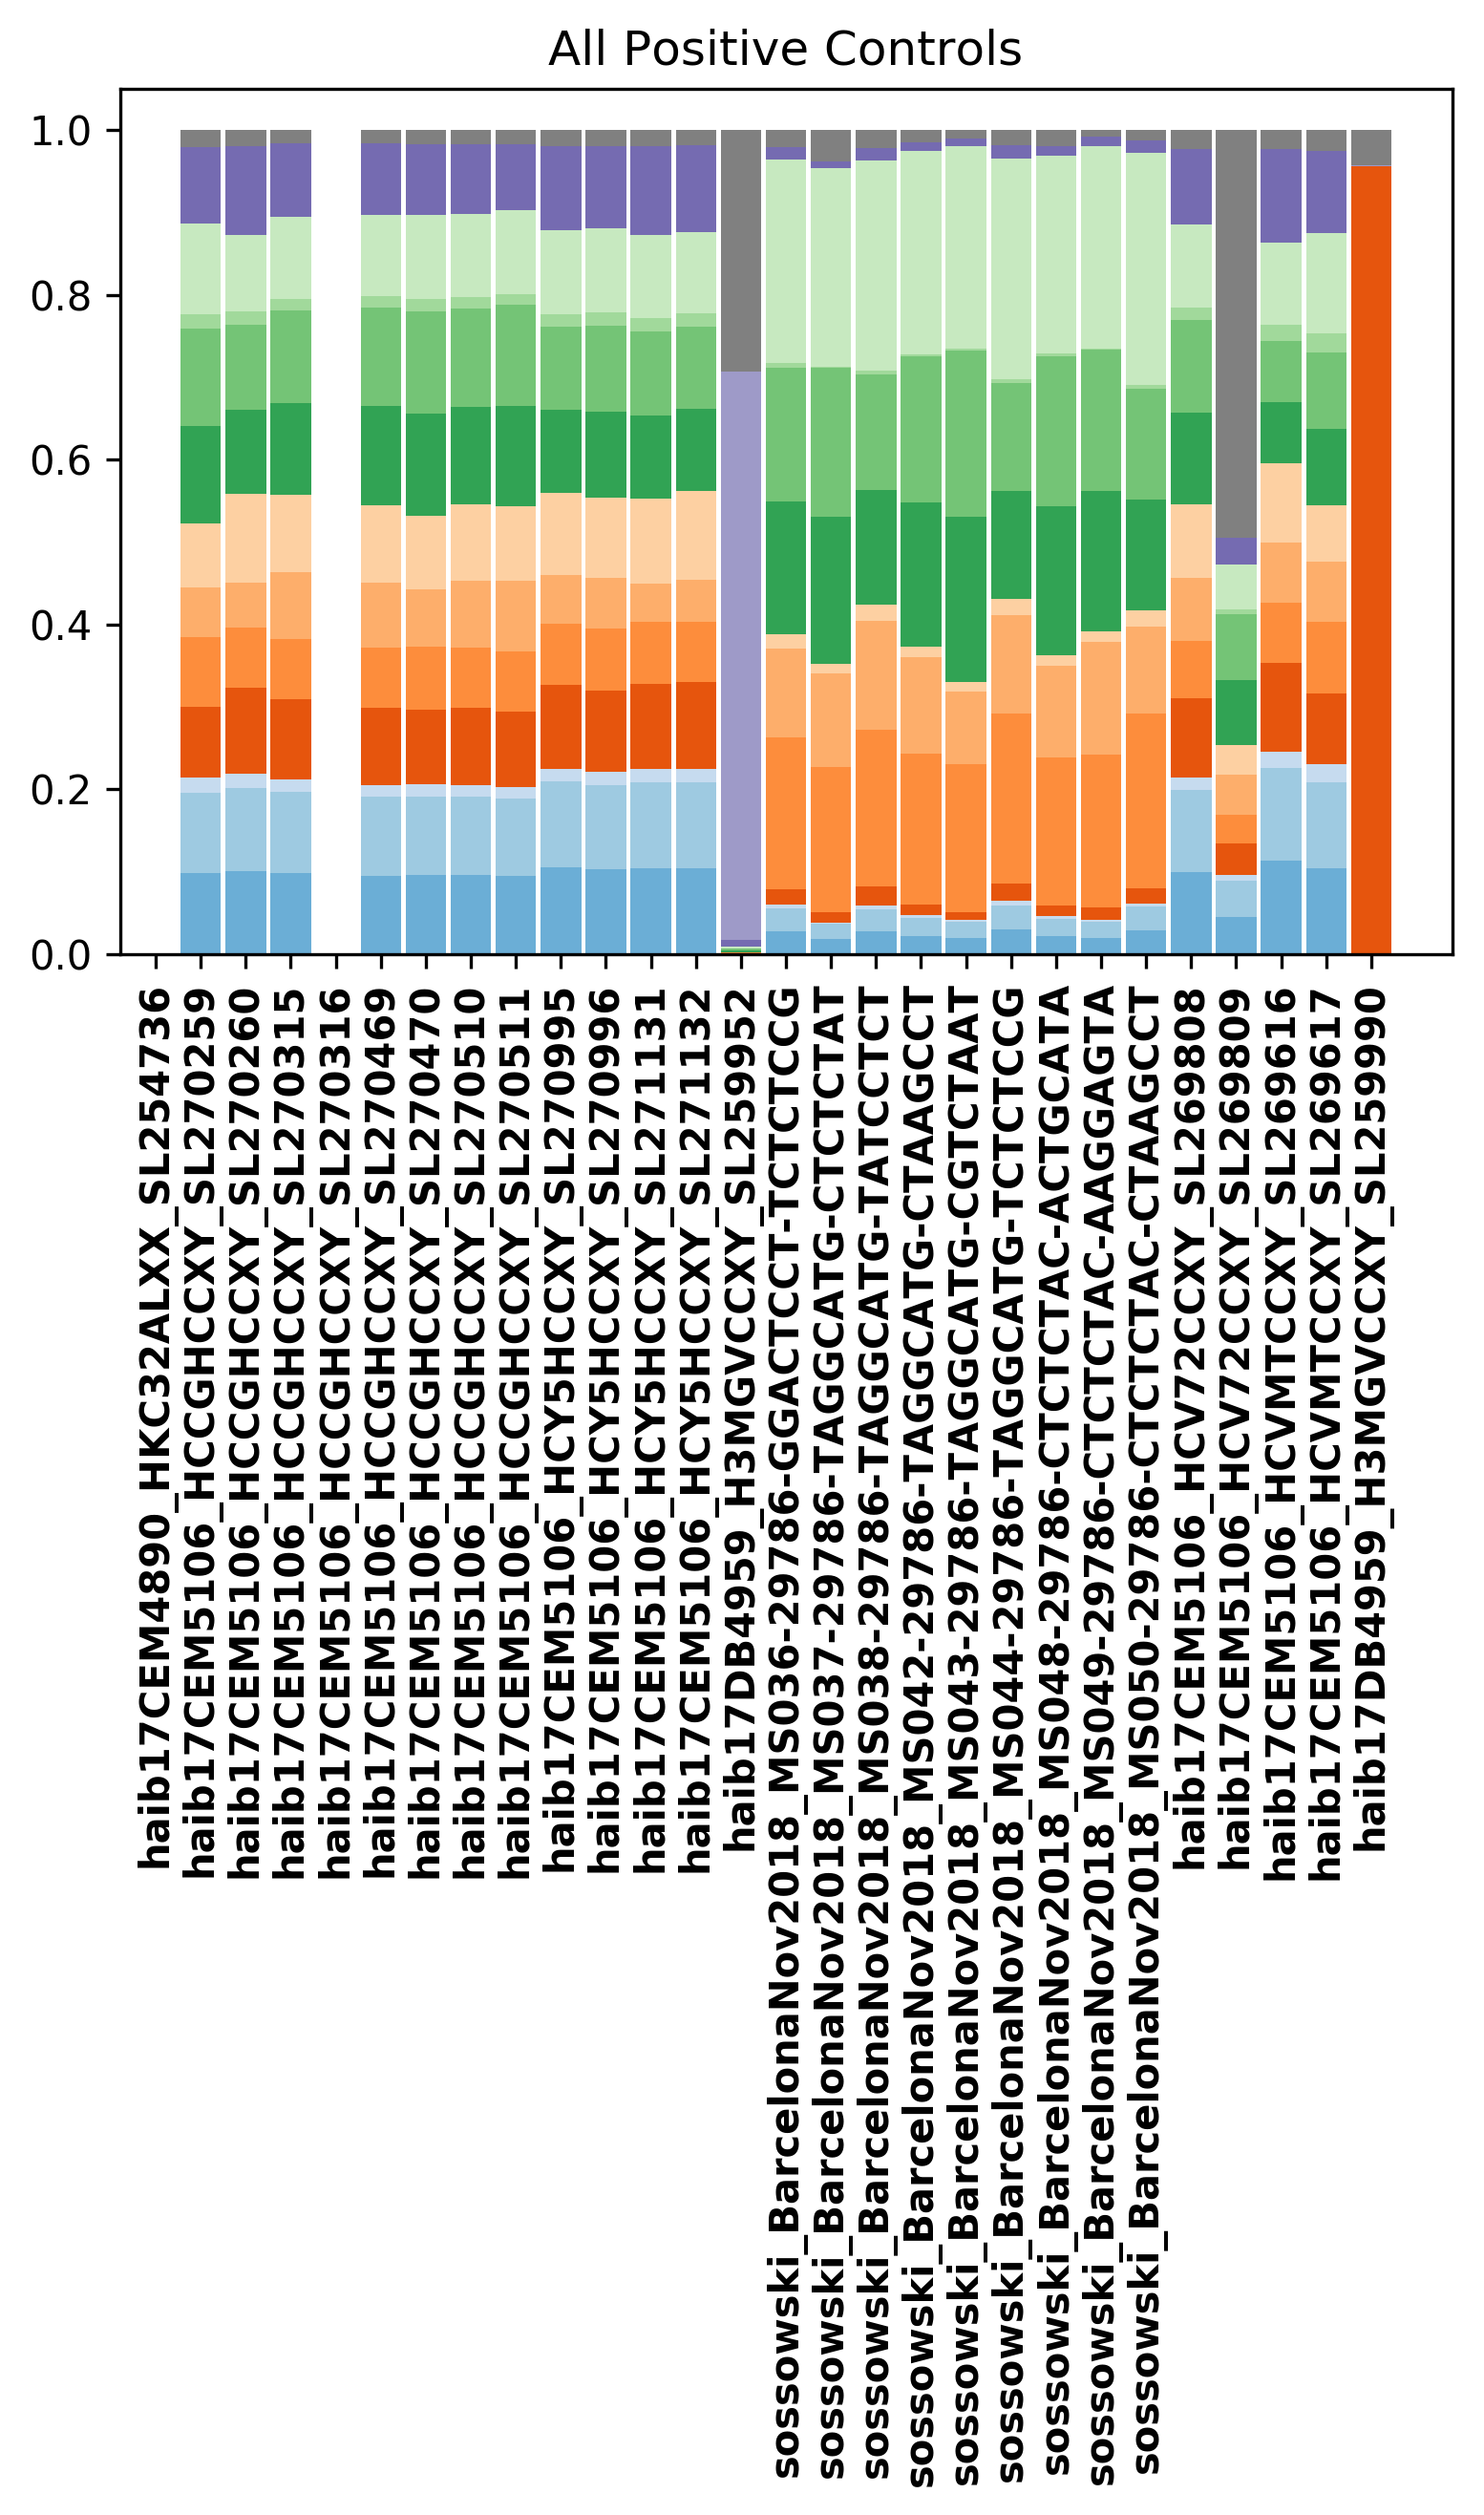

In [103]:
from math import sqrt

p1 = cntrl_tabler.metadata['control_type_fine'].map(lambda x: isinstance(x, str) and 'positive'  in x)
p1 |= cntrl_tabler.metadata['control_type_coarse'].map(lambda x: isinstance(x, str) and 'positive'  in x)

pos_cntrls = cntrl_tabler.metadata.loc[p1, ['ha_id', 'barcode', 'control_type_fine', 'control_type_coarse']]

taxa = cntrl_tabler.taxonomy(normalize=True)
cmap = plt.get_cmap('tab20c')
color_map = {'other': 'grey'}

samps = pos_cntrls.index.tolist()
mytaxa = taxa.loc[samps]
prev, other = [], pd.Series({samp: 0 for samp in samps})
for taxon, col in mytaxa.iteritems():
    if col.mean() < 0.01:
        other += col
        continue
    else:
        color_map[taxon] = color_map.get(taxon, cmap(len(color_map)))
        color = color_map[taxon]
    if prev:
        plt.bar(range(len(samps)), col, bottom=sum(prev), width=0.9, color=color)
        prev.append(col)
    else:
        plt.bar(range(len(samps)), col, width=0.9, color=color)
        prev.append(col)
plt.bar(range(len(samps)), other, bottom=sum(prev), width=0.9, color='grey')
plt.xticks(range(len(samps)), samps, fontweight='bold', rotation=90)

plt.title('All Positive Controls')
fig = plt.gcf()
fig.set_dpi(300)
plt.show()

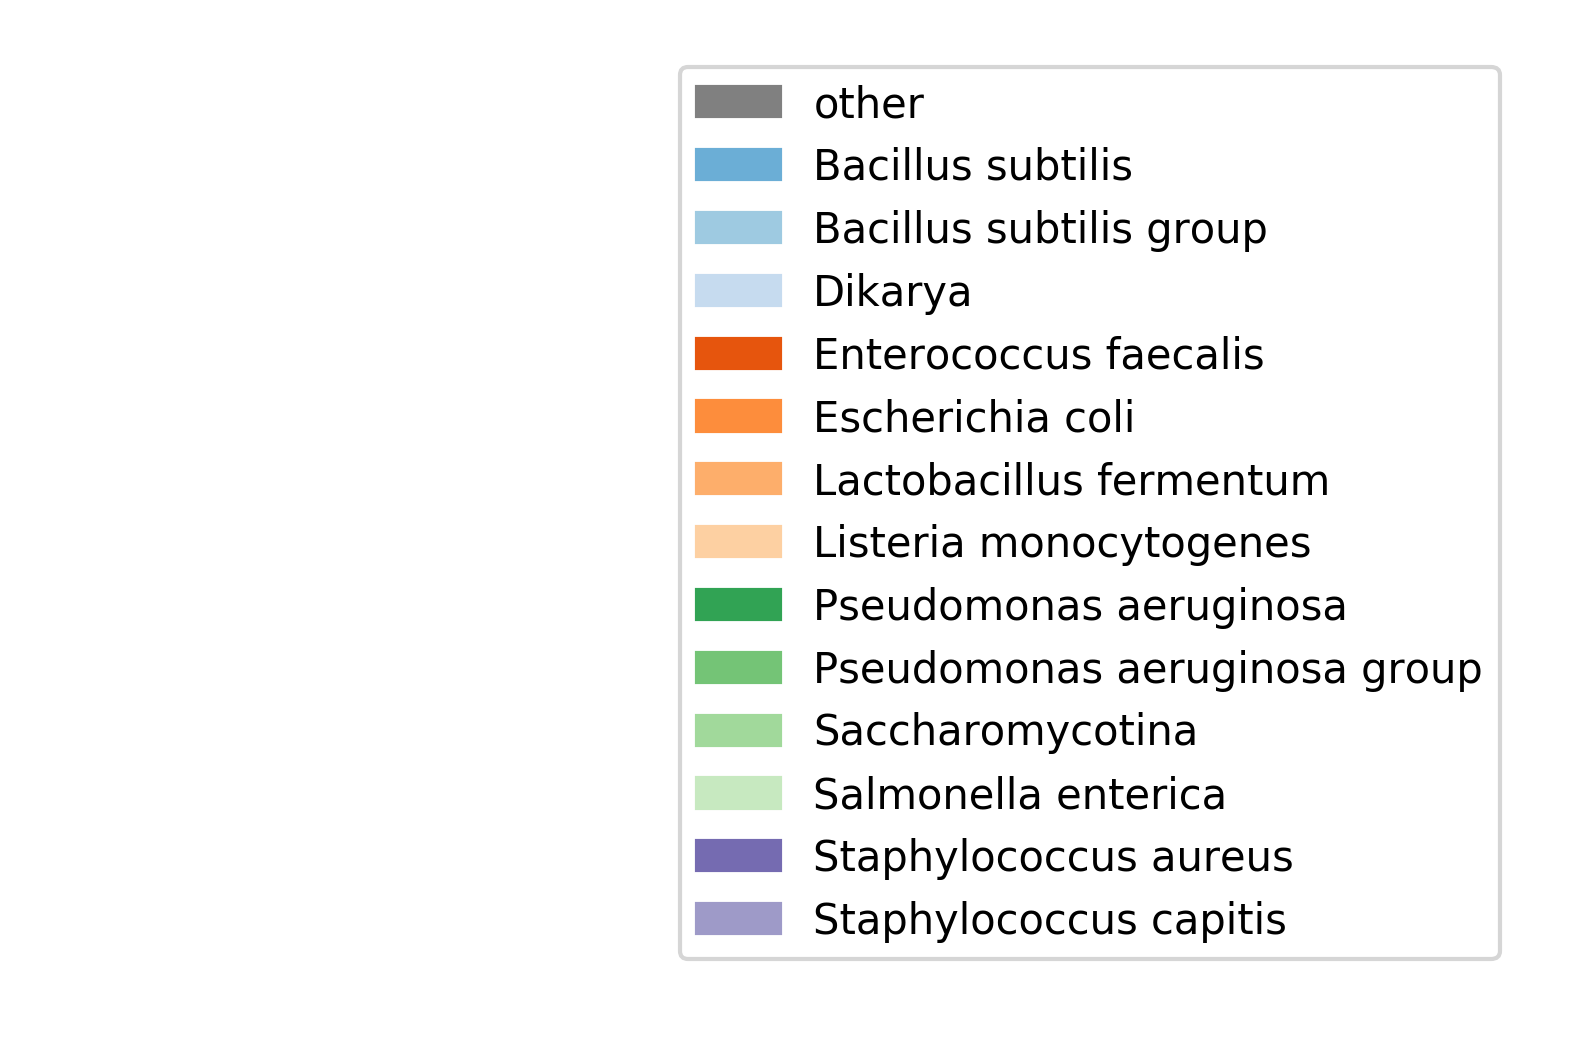

In [104]:
from matplotlib import pyplot as plt        
import matplotlib.patches as mpatches


patches = [mpatches.Patch(color=col, label=taxa) for taxa, col in color_map.items()]
plt.subplots(dpi=300)
plt.legend(handles=patches)

ax = plt.gca()
ax.axis('off')

plt.show()

In [140]:
all_taxa = MetaSUBTableFactory.all_factory().taxonomy(normalize=True)

import scipy

ary = scipy.spatial.distance.cdist(all_taxa, all_taxa.loc[pos_cntrls.index,], metric='jensenshannon')
dists = pd.DataFrame(ary, columns=pos_cntrls.index, index=all_taxa.index)
dists = dists.drop(columns=['haib17CEM4890_HKC32ALXX_SL254736', 'haib17CEM5106_HCCGHCCXY_SL270316', 'haib17DB4959_H3MGVCCXY_SL259952', 'haib17DB4959_H3MGVCCXY_SL259990'])
dists.head()

uuid,haib17CEM5106_HCCGHCCXY_SL270259,haib17CEM5106_HCCGHCCXY_SL270260,haib17CEM5106_HCCGHCCXY_SL270315,haib17CEM5106_HCCGHCCXY_SL270469,haib17CEM5106_HCCGHCCXY_SL270470,haib17CEM5106_HCCGHCCXY_SL270510,haib17CEM5106_HCCGHCCXY_SL270511,haib17CEM5106_HCY5HCCXY_SL270995,haib17CEM5106_HCY5HCCXY_SL270996,haib17CEM5106_HCY5HCCXY_SL271131,...,sossowski_BarcelonaNov2018_MS042-29786-TAGGCATG-CTAAGCCT,sossowski_BarcelonaNov2018_MS043-29786-TAGGCATG-CGTCTAAT,sossowski_BarcelonaNov2018_MS044-29786-TAGGCATG-TCTCTCCG,sossowski_BarcelonaNov2018_MS048-29786-CTCTCTAC-ACTGCATA,sossowski_BarcelonaNov2018_MS049-29786-CTCTCTAC-AAGGAGTA,sossowski_BarcelonaNov2018_MS050-29786-CTCTCTAC-CTAAGCCT,haib17CEM5106_HCV72CCXY_SL269808,haib17CEM5106_HCV72CCXY_SL269809,haib17CEM5106_HCVMTCCXY_SL269616,haib17CEM5106_HCVMTCCXY_SL269617
haib17CEM5106_HCCGHCCXY_SL270457,0.803182,0.804171,0.805501,0.804148,0.803805,0.803345,0.803265,0.801523,0.802551,0.803873,...,0.804920,0.805439,0.804164,0.803033,0.806190,0.804573,0.799515,0.725942,0.803841,0.802551
haib18CEM5453_HMC2KCCXY_SL336828,0.813131,0.813981,0.814534,0.813148,0.812911,0.812147,0.811838,0.811257,0.812417,0.813573,...,0.810819,0.810354,0.812428,0.809241,0.811043,0.812072,0.809717,0.747899,0.815111,0.813942
haib17CEM5106_HCCGHCCXY_SL270244,0.818943,0.819394,0.820697,0.819505,0.819321,0.818801,0.818649,0.816696,0.817938,0.819168,...,0.821086,0.821660,0.820600,0.819328,0.822182,0.821035,0.814653,0.730636,0.819077,0.818508
haib17CEM5106_HCY5HCCXY_SL271181,0.655947,0.664274,0.663441,0.662663,0.660029,0.661113,0.661570,0.657457,0.656460,0.658803,...,0.632379,0.636479,0.619869,0.633281,0.636165,0.619019,0.652702,0.473995,0.659508,0.648480
sossowski_BarcelonaNov2018_CSD16-BCN-067-29786-CGGAGCCT-CCTAGAGT,0.812592,0.813297,0.814751,0.813763,0.813490,0.812561,0.812620,0.811116,0.811374,0.813063,...,0.806283,0.812771,0.802536,0.800594,0.815905,0.808073,0.808562,0.721746,0.812430,0.811486


In [155]:
aves = dists.mean(axis=1)
maybep = set(aves[aves < 0.5].index.tolist())
maybep

{'haib17CEM5106_HCCGHCCXY_SL270259',
 'haib17CEM5106_HCCGHCCXY_SL270260',
 'haib17CEM5106_HCCGHCCXY_SL270261',
 'haib17CEM5106_HCCGHCCXY_SL270315',
 'haib17CEM5106_HCCGHCCXY_SL270317',
 'haib17CEM5106_HCCGHCCXY_SL270318',
 'haib17CEM5106_HCCGHCCXY_SL270320',
 'haib17CEM5106_HCCGHCCXY_SL270322',
 'haib17CEM5106_HCCGHCCXY_SL270323',
 'haib17CEM5106_HCCGHCCXY_SL270329',
 'haib17CEM5106_HCCGHCCXY_SL270331',
 'haib17CEM5106_HCCGHCCXY_SL270346',
 'haib17CEM5106_HCCGHCCXY_SL270347',
 'haib17CEM5106_HCCGHCCXY_SL270348',
 'haib17CEM5106_HCCGHCCXY_SL270385',
 'haib17CEM5106_HCCGHCCXY_SL270396',
 'haib17CEM5106_HCCGHCCXY_SL270469',
 'haib17CEM5106_HCCGHCCXY_SL270470',
 'haib17CEM5106_HCCGHCCXY_SL270482',
 'haib17CEM5106_HCCGHCCXY_SL270510',
 'haib17CEM5106_HCCGHCCXY_SL270511',
 'haib17CEM5106_HCCGHCCXY_SL270512',
 'haib17CEM5106_HCCGHCCXY_SL270523',
 'haib17CEM5106_HCCGHCCXY_SL270535',
 'haib17CEM5106_HCCGHCCXY_SL270558',
 'haib17CEM5106_HCCGHCCXY_SL270562',
 'haib17CEM5106_HCCGHCCXY_SL270567',
 

(28, 4)
(87, 4)
(63, 4)
(63, 5914)


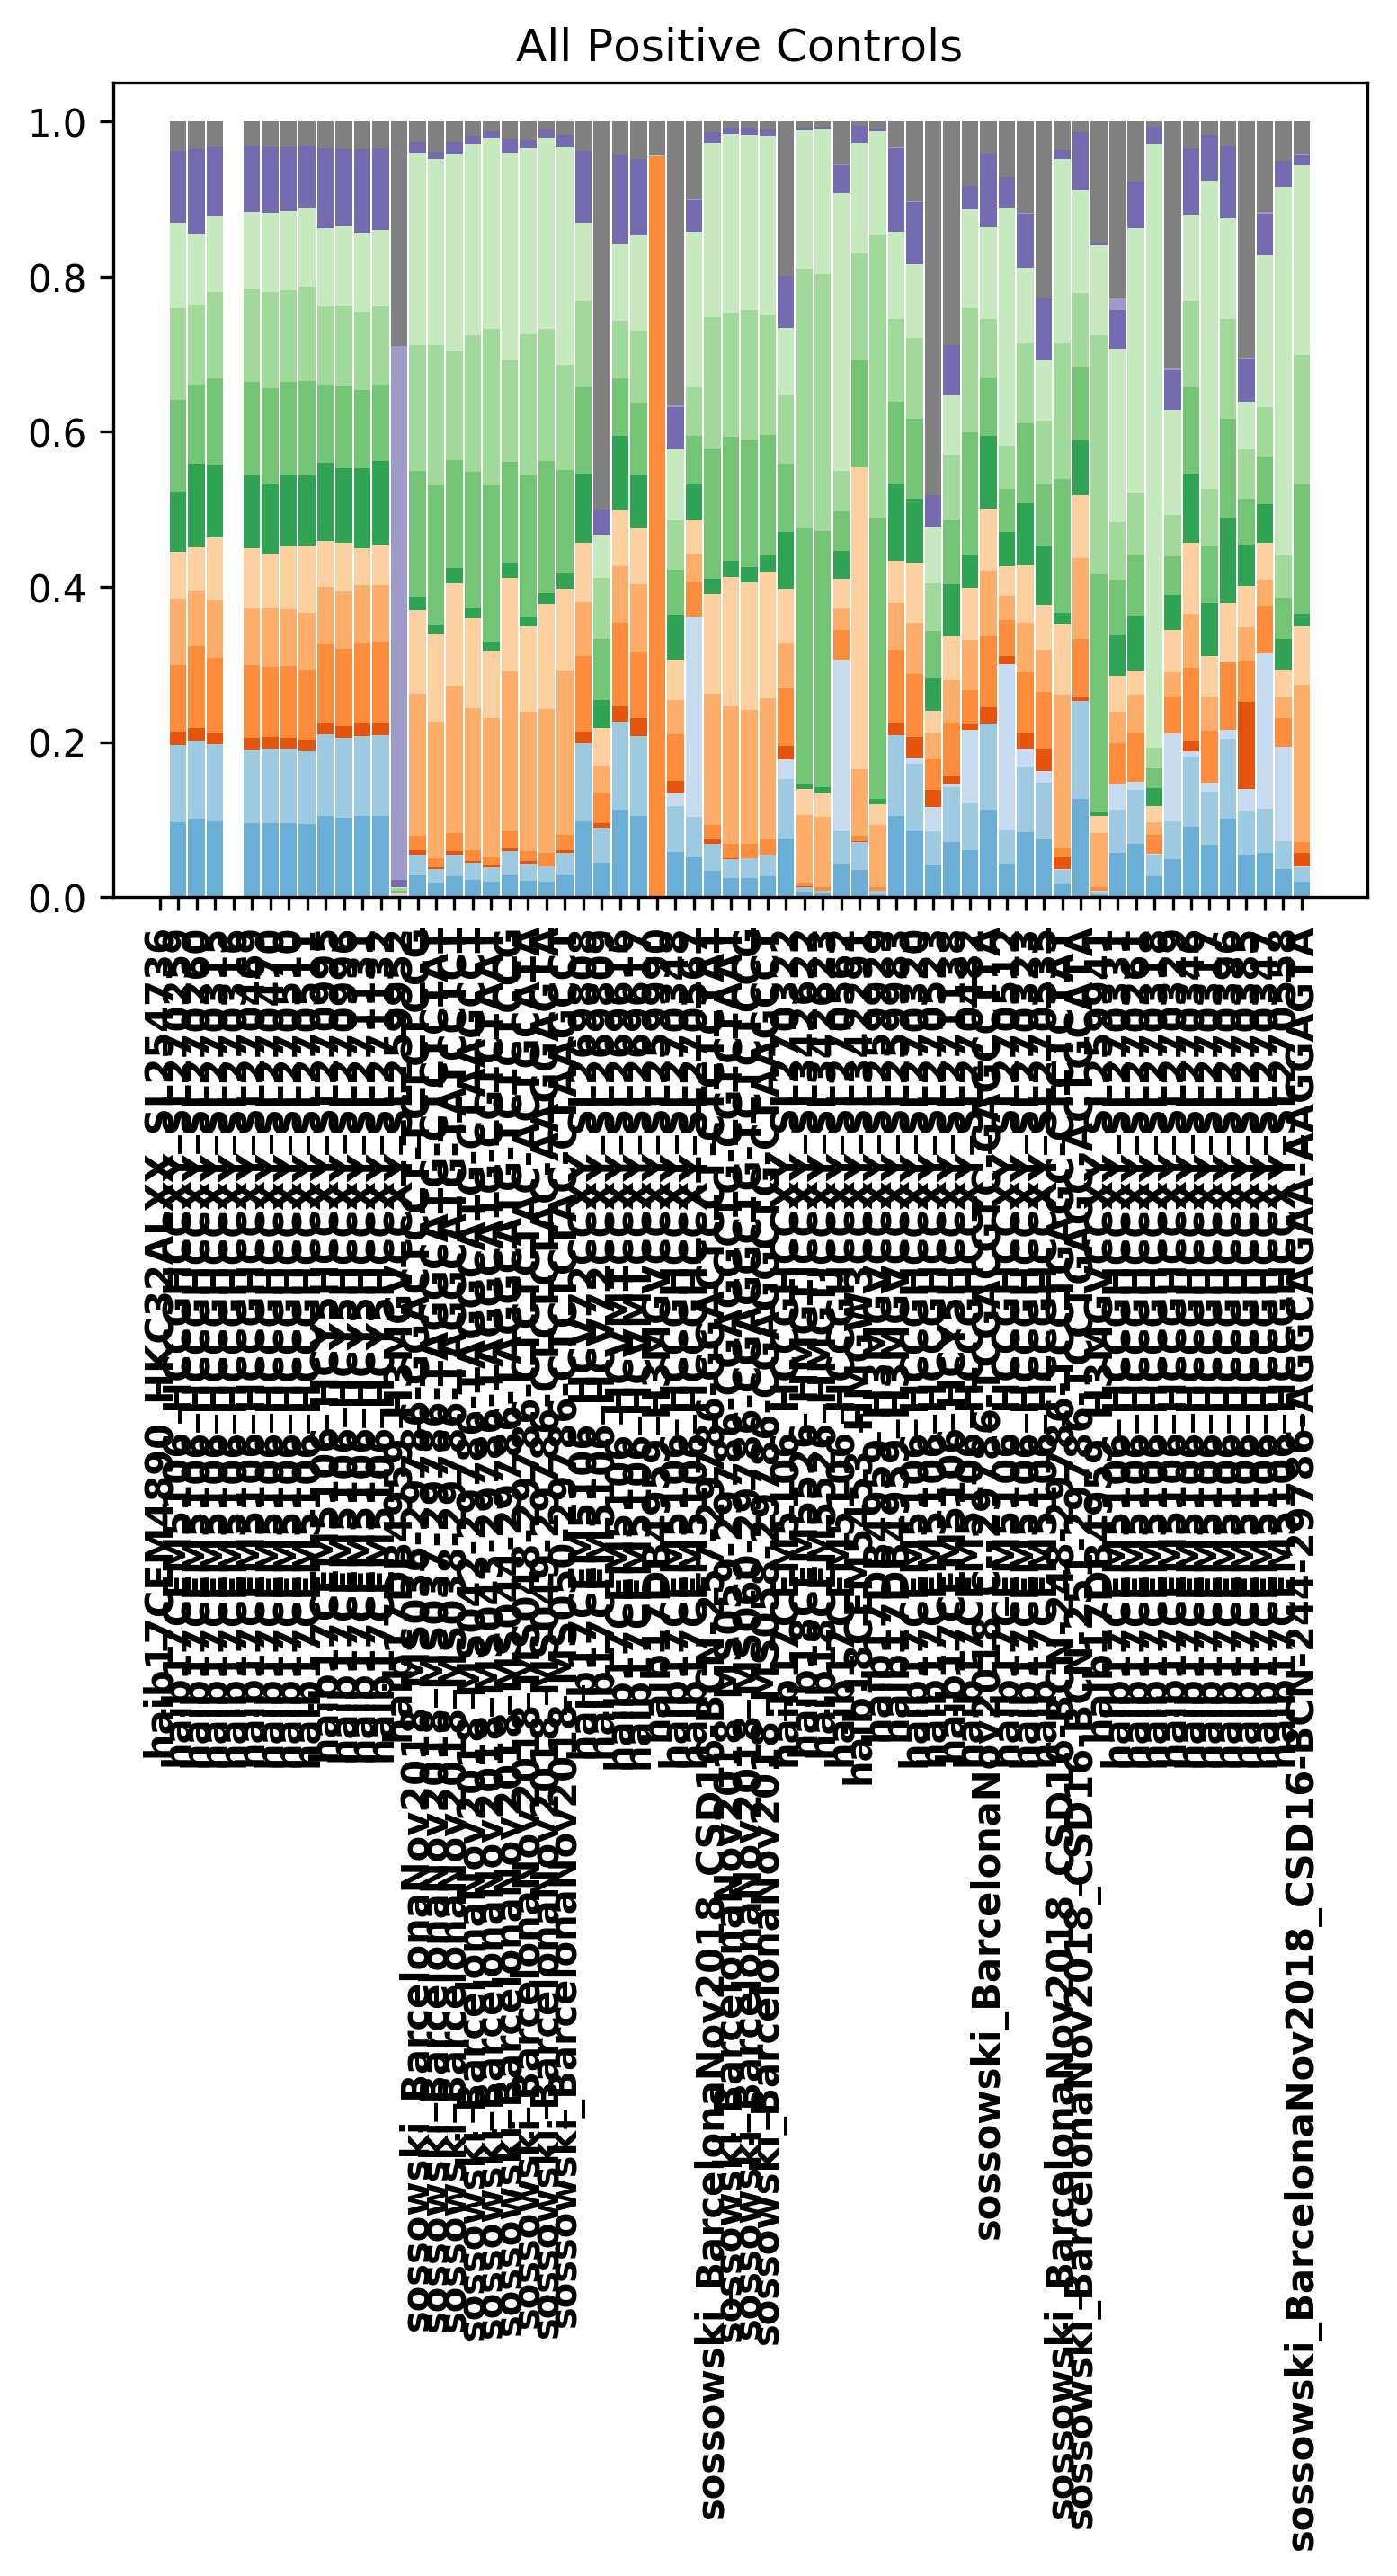

In [156]:
from math import sqrt

all_tabler = MetaSUBTableFactory.all_factory()


p1 = cntrl_tabler.metadata['control_type_fine'].map(lambda x: isinstance(x, str) and 'positive'  in x)
p1 |= cntrl_tabler.metadata['control_type_coarse'].map(lambda x: isinstance(x, str) and 'positive'  in x)


pos_cntrls = cntrl_tabler.metadata.loc[p1, ['ha_id', 'barcode', 'control_type_fine', 'control_type_coarse']]
print(pos_cntrls.shape)
pos_cntrls = pd.concat([pos_cntrls, cntrl_tabler.metadata.loc[maybep, ['ha_id', 'barcode', 'control_type_fine', 'control_type_coarse']]])
print(pos_cntrls.shape)
pos_cntrls = pos_cntrls.loc[~pos_cntrls.index.duplicated(keep='first')]
print(pos_cntrls.shape)

taxa = all_tabler.taxonomy(normalize=True)
cmap = plt.get_cmap('tab20c')
color_map = {'other': 'grey'}

samps = pos_cntrls.index.tolist()
mytaxa = taxa.loc[samps]
print(mytaxa.shape)
prev, other = [], pd.Series({samp: 0 for samp in samps})
for taxon, col in mytaxa.iteritems():
    if col.mean() < 0.01:
        other += col
        continue
    else:
        color_map[taxon] = color_map.get(taxon, cmap(len(color_map)))
        color = color_map[taxon]
    if prev:
        plt.bar(range(len(samps)), col, bottom=sum(prev), width=0.9, color=color)
        prev.append(col)
    else:
        plt.bar(range(len(samps)), col, width=0.9, color=color)
        prev.append(col)
plt.bar(range(len(samps)), other, bottom=sum(prev), width=0.9, color='grey')
plt.xticks(range(len(samps)), samps, fontweight='bold', rotation=90)

plt.title('All Positive Controls')
fig = plt.gcf()
fig.set_dpi(300)
plt.show()